# Question 1

<class 'numpy.ndarray'>
(512, 512) : X.shape


Text(0.5,1,'Edge filter')

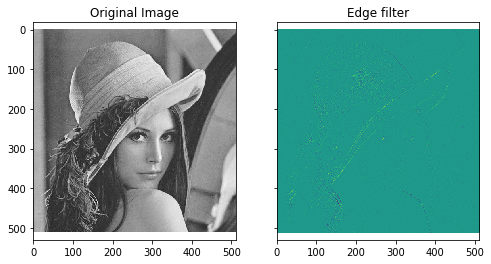

In [74]:
############################## >>>Edge Filter<<< ################################################
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
#importing the image as nparray
img = mpimg.imread('C:\\Users\\aksha\\PycharmProjects\\FirstProject\\lenna4-9e7d6.jpg')
img = np.dot(img[...,:3], [0.299, 0.587, 0.114])
X = np.asarray(img)
print(type(X))    # img.shape=(960x960x3)

#normalise the data
#xmax, xmin = X.max(), X.min()
#X = (X - xmin)/(xmax - xmin)

#print(X[:,:,0].shape)     # each color channel is a 'm * n' matrix of features.
# to see the actual image in only one scale.
#imgplot = plt.imshow(X[:,:,0])
#plt.plot(X)




#taking only one scale as input feature set.
#X=X[:,:,1]
print(X.shape, ": X.shape")

#defining the filter
row_size = len(X[:,0])
col_size = len(X[0,:])
Y = np.array([[1,-1],[1,-1]])


X = np.pad(X, [(0, 1), (0, 1)], mode='constant')

output = np.empty(col_size)
for i in range(row_size):
    c4 = np.array([])
    for j in range(col_size):
        a1, a2 = X[i, j] * Y[0, 0], X[i, j+1] * Y[0, 1]
        b1, b2 = X[i+1, j] * Y[1, 0], X[i+1, j+1] * Y[1, 1]
        c1 = np.hstack((a1, a2))
        c2 = np.hstack((b1, b2))
        #print(c1, c2)
        c3 = np.vstack((c1, c2))
        c3 = np.linalg.det(c3)    # sum can also be used to find the value. The code was tested for both. I've used determinant to try out something new and interesting! Although the sum seems to perform better.
        c4 = np.append(c4, c3)
    output = np.vstack((output, c4))
    #i = i + 1
    #print(i)

#displaying an image
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(8, 4))
img = mpimg.imread('C:\\Users\\aksha\\PycharmProjects\\FirstProject\\lenna4-9e7d6.jpg')
X = np.asarray(img)
ax[0].imshow(X)
ax[0].set_title('Original Image')
ax[1].imshow(output)
ax[1].set_title('Edge filter')

# Question2 - 3: Evaluating network performance for 1 layer CNN using different noise levels

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aksha\\AppData\\Local\\Temp\\tmp680sx103', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020A8392BB38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Batch size:  10  Iteration number:  0 


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Cr

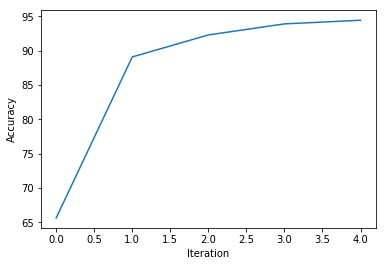

In [56]:
# Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#   http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import sys

# tf.logging.set_verbosity(tf.logging.INFO)
classes = [0, 1, 2, 3]
num_classes = len(classes)


def my_cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    # Input Layer
    # Reshape X to 4-D tensor: [batch_size, width, height, channels]
    # MNIST images are 28x28 pixels, and have one color channel
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

    # Convolutional Layer #1
    # Computes 32 features using a 5x5 filter with ReLU activation.
    # Padding is added to preserve width and height.
    # Input Tensor Shape: [batch_size, 28, 28, 1]
    # Output Tensor Shape: [batch_size, 28, 28, 32]
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)

    # Pooling Layer #1
    # First max pooling layer with a 2x2 filter and stride of 2
    # Input Tensor Shape: [batch_size, 28, 28, 32]
    # Output Tensor Shape: [batch_size, 14, 14, 32]
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

    # Flatten tensor into a batch of vectors
    # Input Tensor Shape: [batch_size, 7, 7, 64]
    # Output Tensor Shape: [batch_size, 7 * 7 * 64]
    pool1_flat = tf.reshape(pool1, [-1, 14 * 14 * 32])

    # Dense Layer
    # Densely connected layer with 1024 neurons
    # Input Tensor Shape: [batch_size, 7 * 7 * 64]
    # Output Tensor Shape: [batch_size, 1024]
    dense = tf.layers.dense(inputs=pool1_flat, units=1024, activation=tf.nn.relu)

    # Add dropout operation; 0.6 probability that element will be kept
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    # Logits layer
    # Input Tensor Shape: [batch_size, 1024]
    # Output Tensor Shape: [batch_size, 10]
    logits = tf.layers.dense(inputs=dropout, units=num_classes)

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    #  Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


#  # Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")

train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
indices = np.isin(train_labels, classes)
sample_train_data = train_data[indices, :]
sample_train_labels = train_labels[indices]
#np.random.shuffle(sample_train_labels[0:5500])  #adding noise here!

eval_data = mnist.test.images  # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
indices_test = np.isin(eval_labels, classes)
sample_eval_data = eval_data[indices_test, :]
sample_eval_labels = eval_labels[indices_test]

# Create the Estimator
mnist_classifier = tf.estimator.Estimator(
    model_fn=my_cnn_model_fn)  # , model_dir="/tmp/mnist_convnet_model")



accuracy = np.array([])
batch_sizes=[10,20,30,40,50]
for i in range(len(batch_sizes)):
    print("\n\nBatch size: ",batch_sizes[i]," Iteration number: ", i,"\n\n")
    # Train the model
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
         x={"x": sample_train_data},
         y=sample_train_labels,
         batch_size=batch_sizes[i],
         num_epochs=None,
         shuffle=True)
    mnist_classifier.train(input_fn=train_input_fn,steps=100)


     # Evaluate the model and print results
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
         x={"x": sample_eval_data},
         y=sample_eval_labels,
         batch_size=batch_sizes[i],
         num_epochs=1,
         shuffle=False)
    eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
    lol = eval_results['accuracy']
    print(lol)
    accuracy = np.append(accuracy, float(lol)*100)
    print(eval_results)
    print("\nTest Results: ",eval_results,"\n")
        
        
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.show()

From the above figure, it can be seen that the accuracy increases as the number of iteration increases. In each iteration the batch size has been increased by a defined size.
Thus, we can say that the neural network performs better when it has large data. However, its performance on smaller data sets is not good.

# Question2 - 4: Plotting the accuracies for different noise levels

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


For noise % =  10 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aksha\\AppData\\Local\\Temp\\tmpoz8ry31v', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020A84B8E470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverH

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\aksha\AppData\Local\Temp\tmph0cwl3pb\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-22-15:24:02
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.30238152, global_step = 1000, loss = 1.3818768
0.30238152

 Evaluation Results:  {'accuracy': 0.30238152, 'loss': 1.3818768, 'global_step': 1000} 



For noise % =  75 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aksha\\AppData\\Local\\Temp\\tmp6rld7sa1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020A

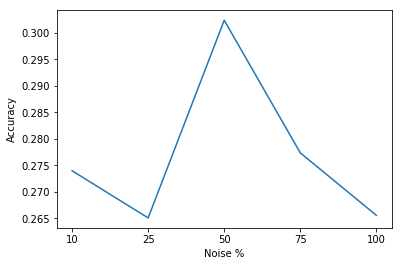

In [58]:
# Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#   http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import sys
#tf.logging.set_verbosity(tf.logging.INFO)
classes = [0,1,2,3]
num_classes = len(classes)

def my_cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units= num_classes)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

 #  Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


#  # Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
indices = np.isin(train_labels,classes)
sample_train_data = train_data[indices,:]

noises=[10,25,50,75,100]
error_train = np.array([])
error_test = np.array([])
accuracy = np.array([])
for i in range(len(noises)):
    print("\n\nFor noise % = ",noises[i],"\n")
    sample_train_labels = train_labels[indices]
    np.random.shuffle(sample_train_labels[0:int(len(sample_train_labels)/(noises[i]/100))])  #adding noise here!

    eval_data = mnist.test.images  # Returns np.array
    eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
    indices_test = np.isin(eval_labels,classes)
    sample_eval_data = eval_data[indices_test,:]
    sample_eval_labels = eval_labels[indices_test]

        # Create the Estimator
    mnist_classifier = tf.estimator.Estimator(
            model_fn=my_cnn_model_fn)#, model_dir="/tmp/mnist_convnet_model")

        # Train the model
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
            x={"x": sample_train_data},
            y=sample_train_labels,
            batch_size=10,
            num_epochs=None,
            shuffle=True)
    mnist_classifier.train(
            input_fn=train_input_fn,
            steps=1000)

        # Evaluate the model and print results
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
            x={"x": sample_eval_data},
            y=sample_eval_labels,
            batch_size=10,
            num_epochs=1,
            shuffle=False)
    eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
    acc = eval_results['accuracy']
    print(acc)
    accuracy = np.append(accuracy, float(acc))
    print("\n Evaluation Results: ",eval_results,"\n")


xi = [i for i in range(0, len(noises))]
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.xlabel("Noise %")
plt.ylabel("Accuracy")
plt.xticks(xi,noises)
plt.show()

As we can see above, as we increase the noise the models starts to perform poorly. This is because of the low number of steps. If we increase the number of steps then we can see that the accuracy of the model decreases as we increase the noise.

# Evaluating the model with different noise levels anddifferent batch sizes for each noise level

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


Noise %:  10  For Batch_size =  10 Iteration number:  0 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aksha\\AppData\\Local\\Temp\\tmp0d216nyw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020A84263278>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
I

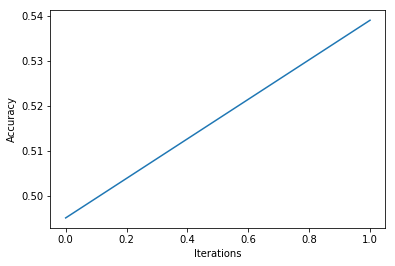



Noise %:  25  For Batch_size =  10 Iteration number:  0 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aksha\\AppData\\Local\\Temp\\tmp08oid66h', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020A83B667F0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoi

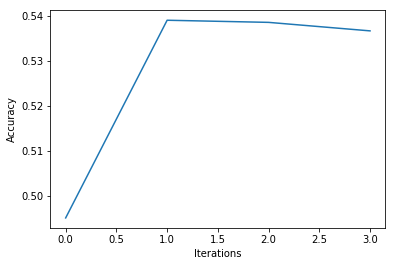



Noise %:  50  For Batch_size =  10 Iteration number:  0 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aksha\\AppData\\Local\\Temp\\tmp9_nj8iz9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020A83764A90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoi

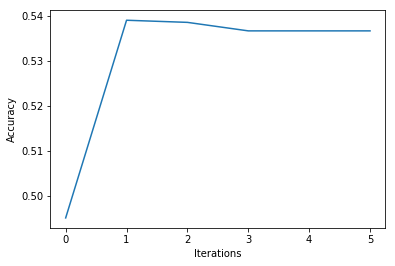



Noise %:  75  For Batch_size =  10 Iteration number:  0 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aksha\\AppData\\Local\\Temp\\tmpa_co7s4m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020A849E1080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoi

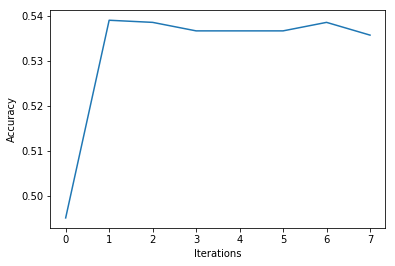



Noise %:  100  For Batch_size =  10 Iteration number:  0 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aksha\\AppData\\Local\\Temp\\tmpen1x5czf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020A8347F908>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpo

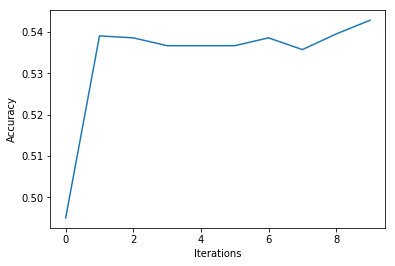

In [51]:
# Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#   http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import sys
#tf.logging.set_verbosity(tf.logging.INFO)
classes = [0,1]
num_classes = len(classes)

def my_cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units= num_classes)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

 #  Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


#  # Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
indices = np.isin(train_labels,classes)
sample_train_data = train_data[indices,:]
noises=[10,25,50,75,100]
batch_sizes=[10,20]
error_train = np.array([])
error_test = np.array([])
accuracy = np.array([])
for k in range(len(noises)):
    
    sample_train_labels = train_labels[indices]
    np.random.shuffle(sample_train_labels[0:int(len(sample_train_labels)/(noises[k]/100))])  #adding noise here!

    eval_data = mnist.test.images  # Returns np.array
    eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
    indices_test = np.isin(eval_labels,classes)
    sample_eval_data = eval_data[indices_test,:]
    sample_eval_labels = eval_labels[indices_test]
    for i in range(len(batch_sizes)):

        print("\n\nNoise %: ",noises[k]," For Batch_size = ",batch_sizes[i],"Iteration number: ",i,"\n")
            # Create the Estimator
        mnist_classifier = tf.estimator.Estimator(
                model_fn=my_cnn_model_fn)#, model_dir="/tmp/mnist_convnet_model")

            # Train the model
        train_input_fn = tf.estimator.inputs.numpy_input_fn(
                x={"x": sample_train_data},
                y=sample_train_labels,
                batch_size=batch_sizes[i],
                num_epochs=None,
                shuffle=True)
        mnist_classifier.train(
                input_fn=train_input_fn,
                steps=1000)

            # Evaluate the model and print results
        eval_input_fn = tf.estimator.inputs.numpy_input_fn(
                x={"x": sample_eval_data},
                y=sample_eval_labels,
                batch_size=batch_sizes[i],
                num_epochs=1,
                shuffle=False)
        eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
        acc = eval_results['accuracy']
        print(acc)
        accuracy = np.append(accuracy, float(acc))
        print("\n Evaluation Results: ",eval_results,"\n")


    
    import matplotlib.pyplot as plt
    plt.plot(accuracy)
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()

In the above code, the model has been tested for different levels of noise. For each noise level, the performance of the model has been tested for different batch sizes. As the batch sizes are increased irrespective of the noise levels, the model's accuracy improves. The NN performs better with large data sets which can be interpreted from the results.

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


Noise %: 100 For Batch_size =  10 Iteration number:  0 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\aksha\\AppData\\Local\\Temp\\tmp1d3la11r', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020A85719A90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
IN

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-22-16:11:48
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.5361702, global_step = 2000, loss = 0.69785833
0.69785833

 Evaluation Results:  {'accuracy': 0.5361702, 'loss': 0.69785833, 'global_step': 2000} 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-22-16:11:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\aksha\AppData\Local\Temp\tmpjgw4__dr\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-22-16:11:57
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.5312742, global_step = 2000, loss = 0.69107884
0.69107884

 Evaluation Results:  {'accuracy': 0.5312742, 'loss': 0.69107884, 'global_step': 2000} 



Noise %: 100 For Ba

INFO:tensorflow:loss = 0.680821, step = 1601 (10.419 sec)
INFO:tensorflow:global_step/sec: 9.34321
INFO:tensorflow:loss = 0.69798326, step = 1701 (10.702 sec)
INFO:tensorflow:global_step/sec: 10.0361
INFO:tensorflow:loss = 0.6828422, step = 1801 (9.964 sec)
INFO:tensorflow:global_step/sec: 10.4444
INFO:tensorflow:loss = 0.70436996, step = 1901 (9.574 sec)
INFO:tensorflow:Saving checkpoints for 2000 into C:\Users\aksha\AppData\Local\Temp\tmpr_qdy6x9\model.ckpt.
INFO:tensorflow:Loss for final step: 0.67671263.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-03-22-16:17:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\aksha\AppData\Local\Temp\tmpr_qdy6x9\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-03-22-16:17:52
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.536643, 

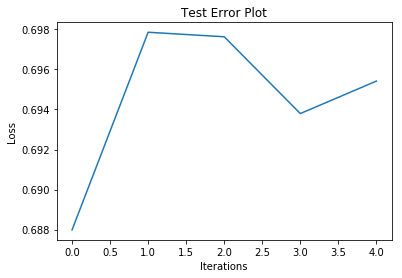

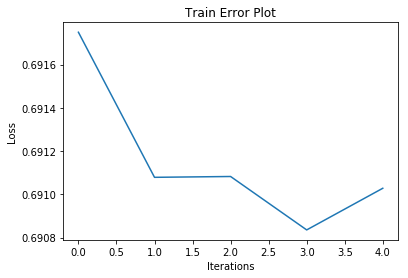

In [71]:
# Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#   http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import sys
#tf.logging.set_verbosity(tf.logging.INFO)
classes = [0,1]
num_classes = len(classes)

def my_cnn_model_fn(features, labels, mode):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units= num_classes)

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

 #  Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


#  # Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
  
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
indices = np.isin(train_labels,classes)
sample_train_data = train_data[indices,:]
noises=[100]
batch_sizes=[10,20,30,40,50]

accuracy = np.array([])
for k in range(1):
    error1 = np.array([])
    error2 = np.array([])
    sample_train_labels = train_labels[indices]
    np.random.shuffle(sample_train_labels[0:int(len(sample_train_labels)/(100/100))])  #adding noise here!

    eval_data = mnist.test.images  # Returns np.array
    eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
    indices_test = np.isin(eval_labels,classes)
    sample_eval_data = eval_data[indices_test,:]
    sample_eval_labels = eval_labels[indices_test]
    for i in range(len(batch_sizes)):

        print("\n\nNoise %: 100 For Batch_size = ",batch_sizes[i],"Iteration number: ",i,"\n")
            # Create the Estimator
        mnist_classifier = tf.estimator.Estimator(
                model_fn=my_cnn_model_fn)#, model_dir="/tmp/mnist_convnet_model")

            # Train the model
        train_input_fn = tf.estimator.inputs.numpy_input_fn(
                x={"x": sample_train_data},
                y=sample_train_labels,
                batch_size=batch_sizes[i],
                num_epochs=None,
                shuffle=True)
        mnist_classifier.train(
                input_fn=train_input_fn,
                steps=2000)

            # Evaluate the model and print results
        eval_input_fn = tf.estimator.inputs.numpy_input_fn(
                x={"x": sample_eval_data},
                y=sample_eval_labels,
                batch_size=batch_sizes[i],
                num_epochs=1,
                shuffle=False)
        eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
        err1 = eval_results['loss']
        print(err1)
        error1 = np.append(error1, float(err1))
        print("\n Evaluation Results: ",eval_results,"\n")
        
                    # Evaluate the model and print results
        eval_input_fn = tf.estimator.inputs.numpy_input_fn(
                x={"x": sample_train_data},
                y=sample_train_labels,
                batch_size=batch_sizes[i],
                num_epochs=1,
                shuffle=False)
        eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
        err2 = eval_results['loss']
        print(err2)
        error2 = np.append(error2, float(err2))
        print("\n Evaluation Results: ",eval_results,"\n")


    
    import matplotlib.pyplot as plt
    plt.title("Test Error Plot")
    plt.plot(error1)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
    plt.title("Train Error Plot")
    plt.plot(error2)
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
    
    

For 100% accuracy and the accuracy increases as the iteration progresses. Each iteration, the batch size has been increased. So, with 100% noise the accuracy of the model is very low, but increases as we increase the batch size. We can interpret that even though CNN are tolerable to noise, the model with low noise will always perform better than model with higher noise. The train and test error both decrease dramatically as the iteration progresses.